**Predicting Employee Turnover and Enhancing Retention Strategies at Salifort Motors**


$Task:$ To analyze employee survey data and build a predictive model to identify the likelihood of employee turnover and to provide actionable insights and strategies for Salifort Motors to improve employee retention, enhance job satisfaction, and reduce costs associated with hiring and training new employees.

$Step1:$ Imports

In [1]:
#Import packages
import os

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
#column settings
pd.set_option('display.max_columns', None)

In [3]:
#Import data
get_cwd = os.getcwd()
df0 = pd.read_csv(get_cwd + '/SM_employee_data.csv')

$Step2:$ Data Exploration (Data Cleaning and EDA)

In [4]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Basic info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#Basic stats
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
#Rename columns
df0.rename(columns = {'Work_accident': 'work_accident', 'Department': 'department', 
                      'number_project': 'total_projects', 'time_spend_company': 'tenure'}, 
                      inplace=True)

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'total_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
#Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
total_projects           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
#Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [11]:
#Inspect duplicates
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,total_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
#Drop dupplicates and save as df
df = df0.drop_duplicates()

df.duplicated().sum()

np.int64(0)

In [13]:
df.head()

,satisfaction_level,last_evaluation,total_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='tenure'>

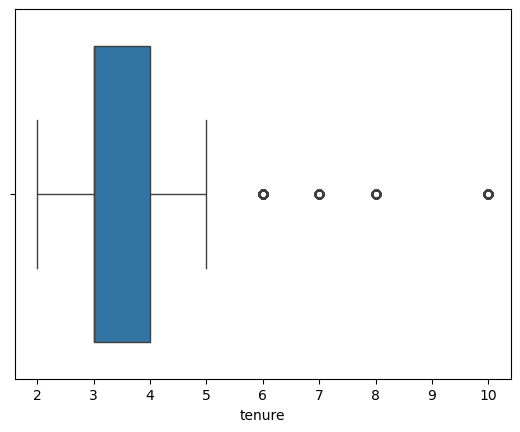

In [14]:
#Check for outliers
#Creat a boxplot to visualize distribution of tenure and detect any outliers

sns.boxplot(x = df['tenure'])

In [15]:
#Determine the number of rows containing outliers
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

outliers = df[(df['tenure'] < lower_limit) | (df['tenure']  > upper_limit)]
print(outliers.shape)

print("Number of rows containing outliers:", outliers.shape[0])

(824, 10)
Number of rows containing outliers: 824


In [16]:
#Get the numbeer of people who left vs who stayed
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [17]:
#Determine the percentage of people who left vs who stayed
df['left'].value_counts(normalize = True) * 100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

Data Visualization

Text(0.5, 1.0, 'Number of projects of stayed v/s left')

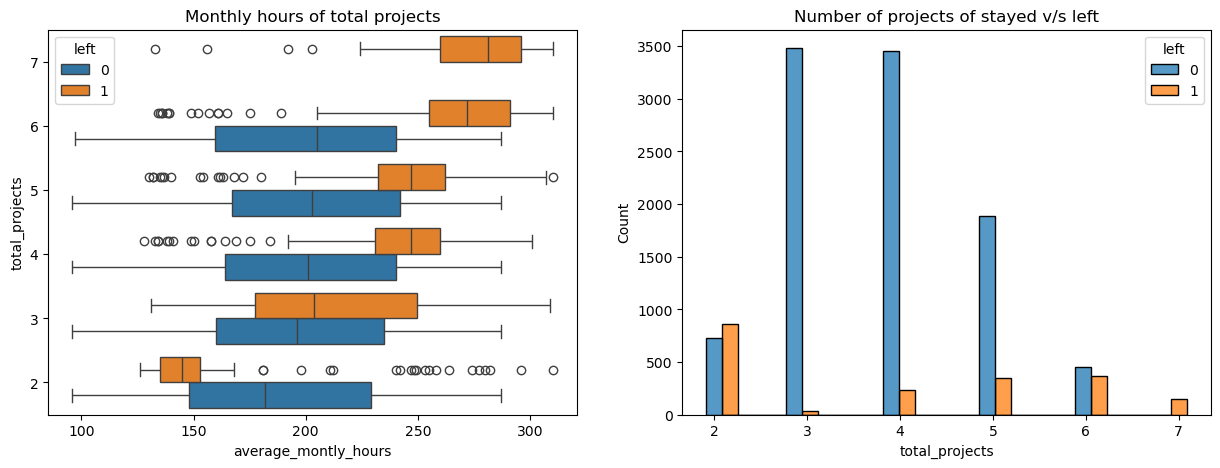

In [18]:
#Boxplot - average_monthly_hours and total_projects comparing the employees who left v/s who stayed
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.boxplot(x = df['average_montly_hours'], 
            y = df['total_projects'], 
            hue = df['left'], ax = ax[0], orient='h')
ax[0].set_title('Monthly hours of total projects')
ax[0].invert_yaxis()

#Histogram - Number of projects comparing the employees who left v/s who stayed
sns.histplot(x = df['total_projects'], hue = df['left'], multiple = 'dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects of stayed v/s left')

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: 

(A) those who worked considerably less than their peers with the same number of projects, and 

(B) those who worked much more. 

Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

In [19]:
#Confirm all employees who left had 7 projects
df[df['total_projects'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

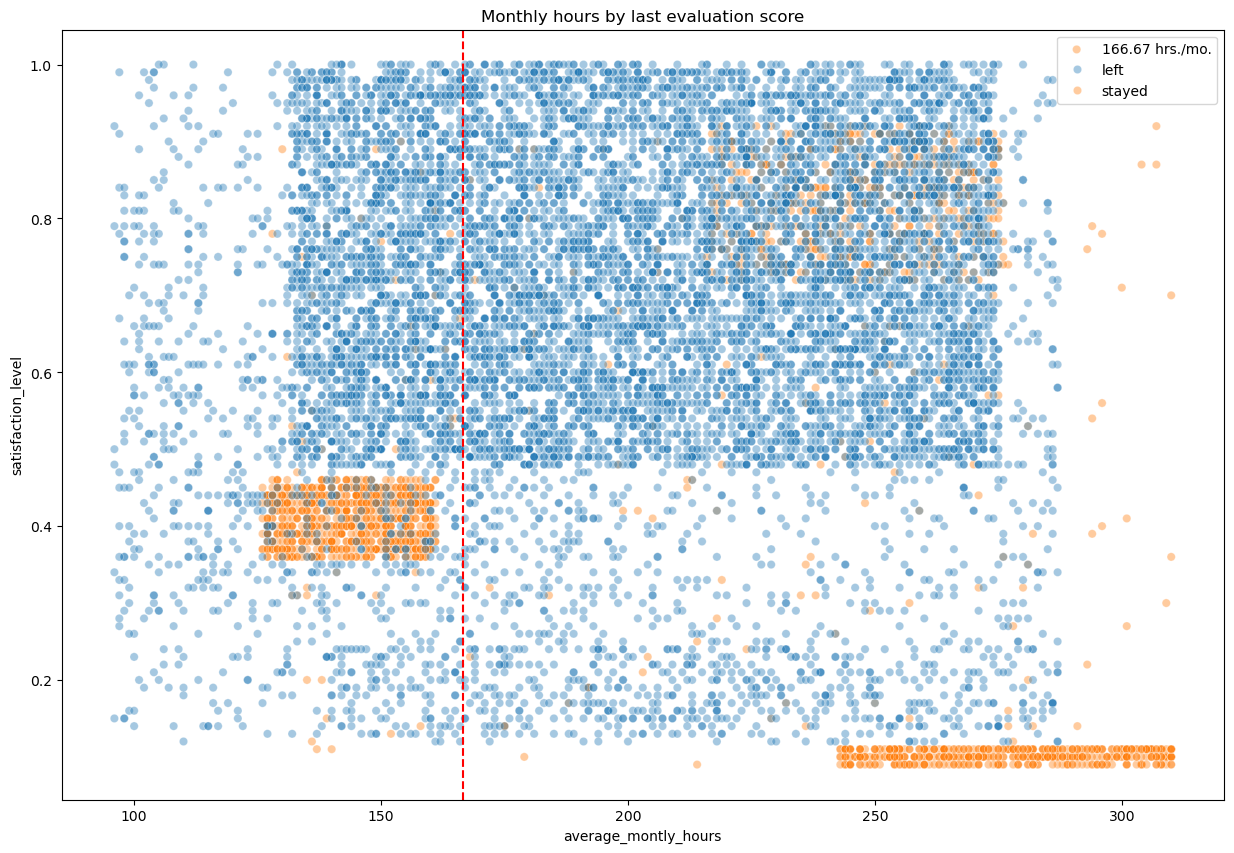

In [20]:
#Scatterplot for average_monthly_hours and satisfaction_levels
plt.figure(figsize=(15,10))
sns.scatterplot(x = df['average_montly_hours'], 
                y = df['satisfaction_level'], 
                hue = df['left'], alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs./mo.', ls='--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score')

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

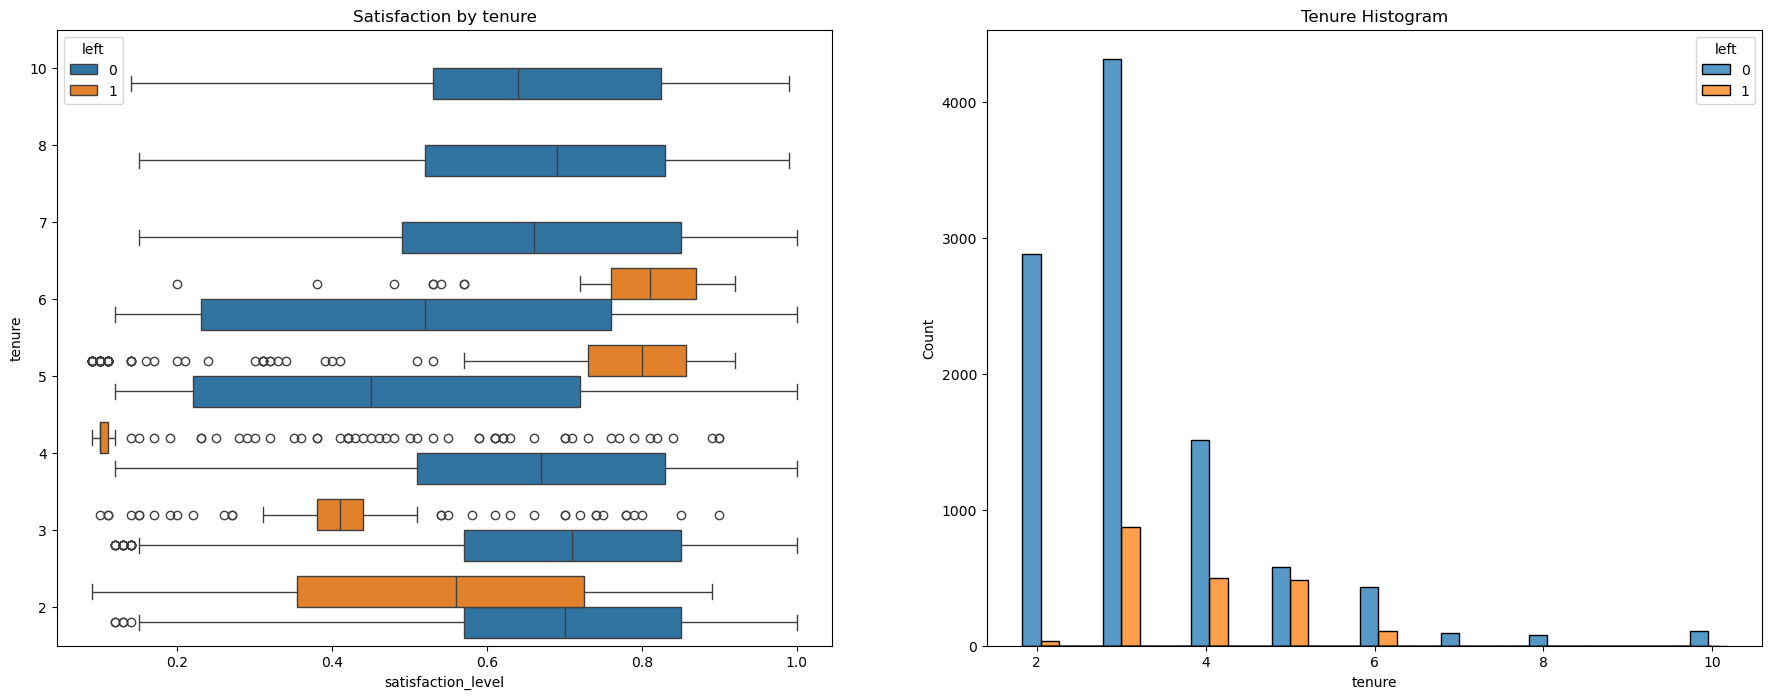

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

#Boxplot for satisfaction_level by tenure for left v/s stayed 
sns.boxplot(y = df['tenure'], 
            x = df['satisfaction_level'], 
            hue = df['left'], ax = ax[0], orient = 'h')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')

#Histogram for distribution of tenure comparing left v/s stayed
sns.histplot(x = df['tenure'], hue = df['left'], multiple = 'dodge', shrink=5, ax = ax[1])
ax[1].set_title('Tenure Histogram')

plt.show()

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [22]:
#Mean and median satisfaction level for employees who left vs who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

C:\Users\222817\AppData\Local\Temp\ipykernel_6260\52719801.py:2: FutureWarning: The provided callable <function mean at 0x00000211AE0B87C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
C:\Users\222817\AppData\Local\Temp\ipykernel_6260\52719801.py:2: FutureWarning: The provided callable <function median at 0x00000211AE2076A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Salary Histogram for short-long-tenure people')

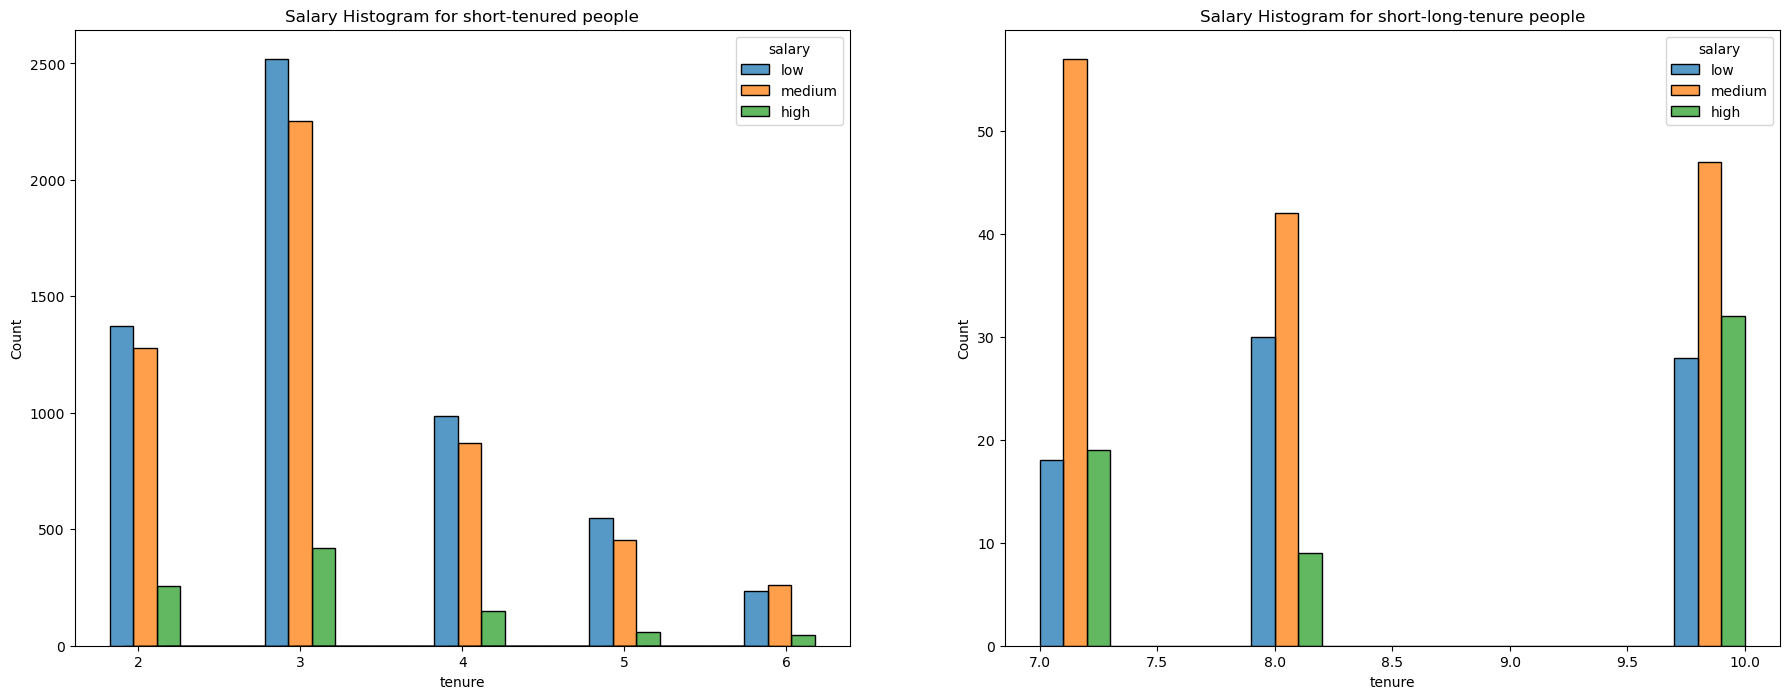

In [23]:
#Examine salary levels of different tenures
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

short_tenure = df[df['tenure'] < 7]
long_tenure = df[df['tenure'] >= 7]

sns.histplot(x = short_tenure['tenure'],
             hue=short_tenure['salary'], 
             hue_order=['low', 'medium', 'high'],
             ax=ax[0], multiple= 'dodge',
             shrink=5)
ax[0].set_title('Salary Histogram for short-tenured people')

sns.histplot(x = long_tenure['tenure'],
             hue=long_tenure['salary'],
             hue_order=['low', 'medium', 'high'],
             ax=ax[1], multiple= 'dodge')
ax[1].set_title('Salary Histogram for short-long-tenure people')

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

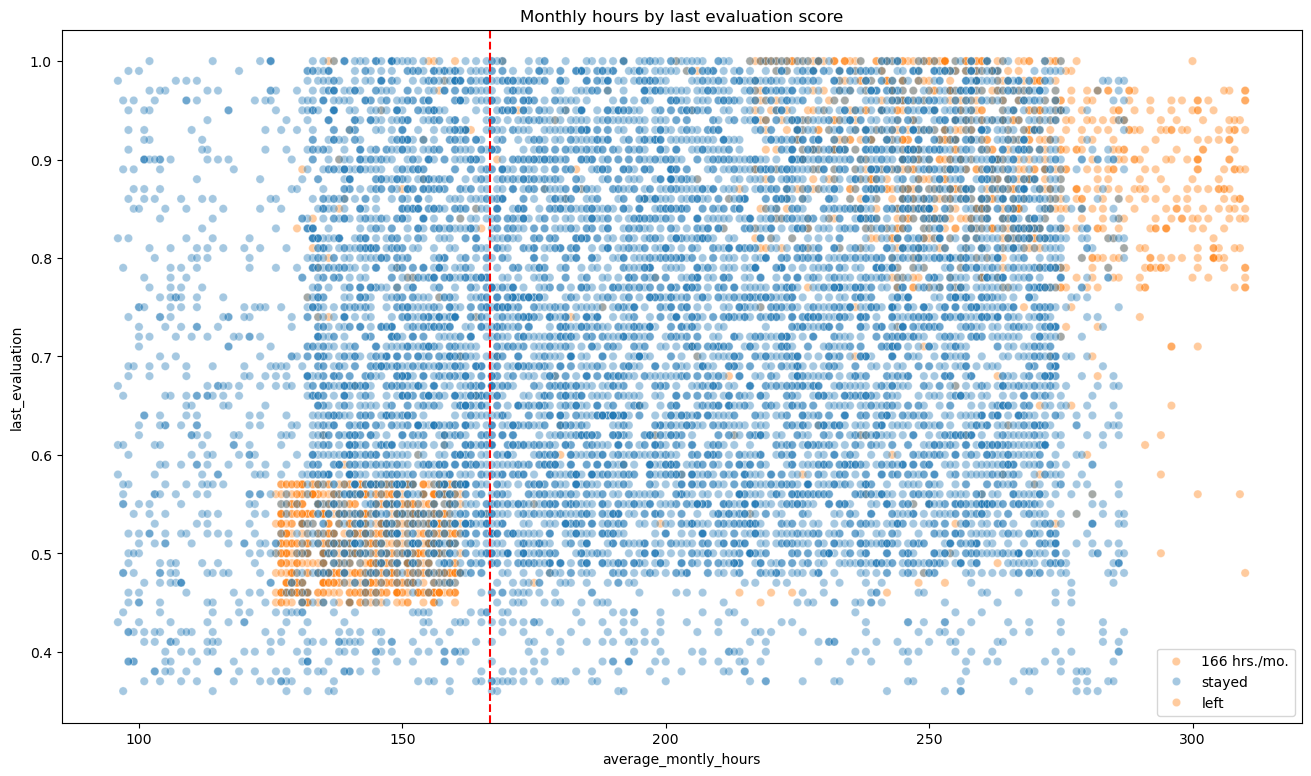

In [24]:
#A scatterplot of average_monthly_hours and last_performance_review
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df['average_montly_hours'], y = df['last_evaluation'],
                hue = df['left'], alpha = 0.4)
plt.axvline(label = "166.67 hrs./mo.", x = 166.67, color = 'red', ls = '--')
plt.legend(labels = ['166 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score')

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

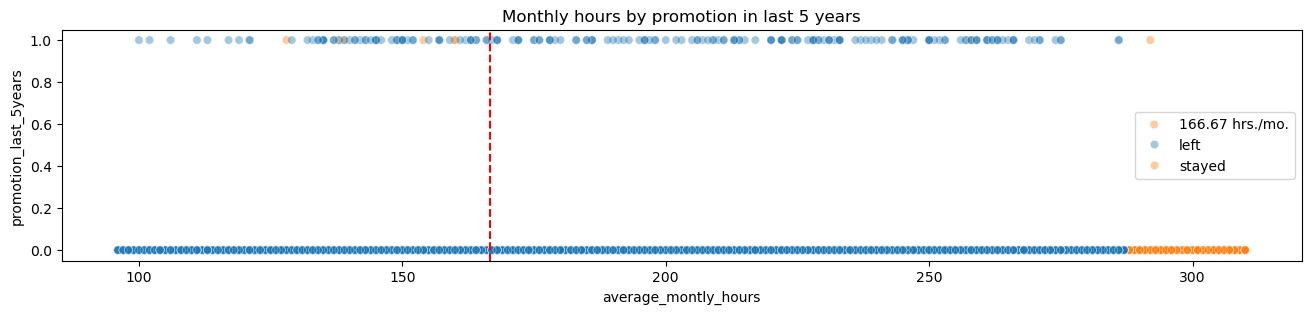

In [25]:
#Examine whether employees who worked very long hours were promoted in the last 5 years
plt.figure(figsize = (16,3))
sns.scatterplot(x = df['average_montly_hours'], y = df['promotion_last_5years'], hue = df['left'], alpha = 0.4)
plt.axvline(x = 166.67, color = 'red', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion in last 5 years')
plt.show()

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

In [26]:
#Employees who left are distributed across departments
df['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of stayed/left by department')

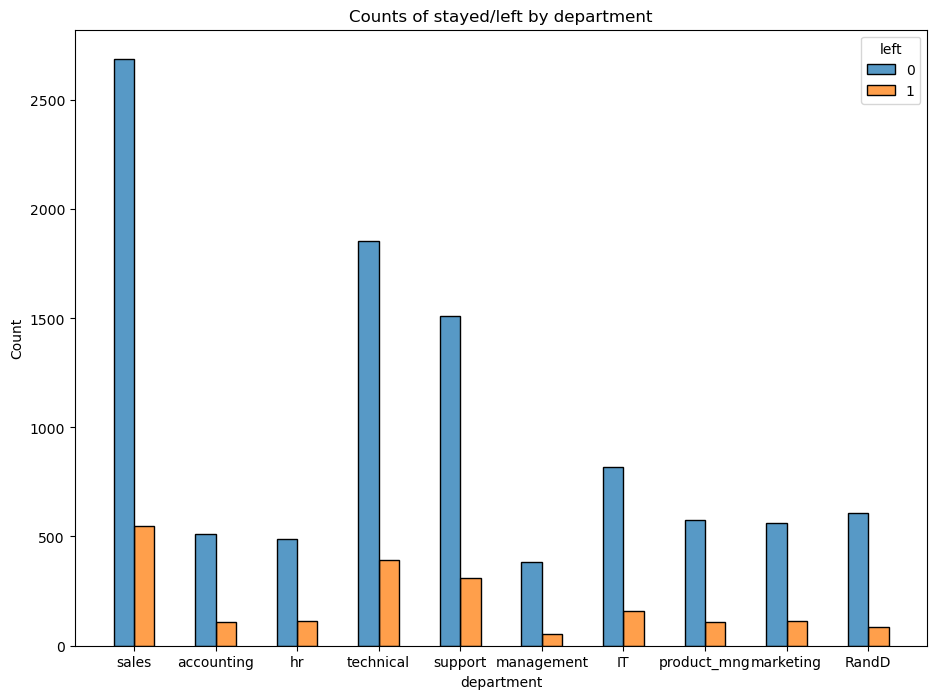

In [27]:
#Stacked histogram to compare department distribution of employees who left v/s who stayed.
plt.figure(figsize=(11,8))
sns.histplot(x = df['department'], hue = df['left'], hue_order = [0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by department')

Text(0.5, 1.0, 'Correlation Heatmap')

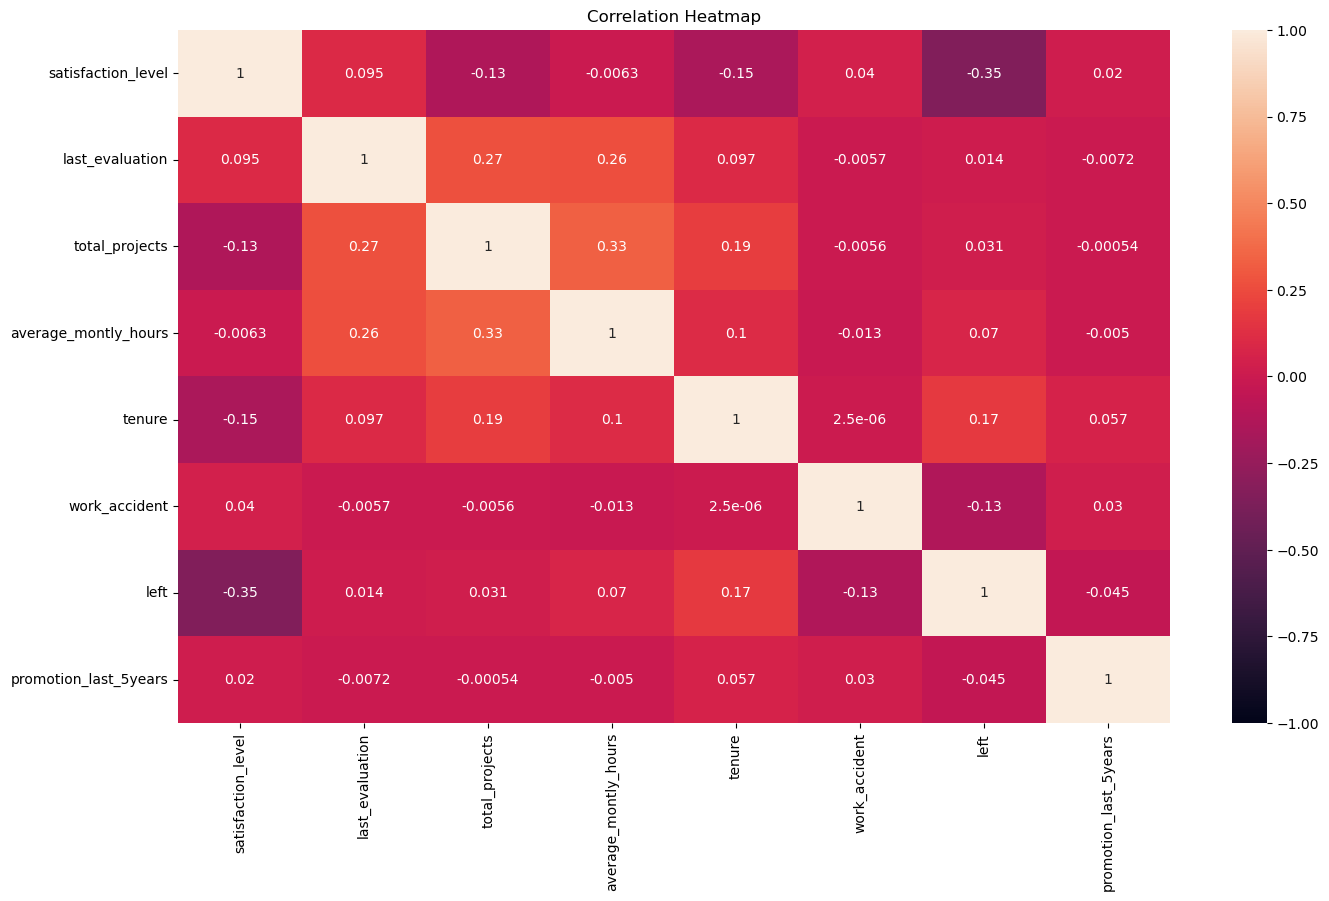

In [28]:
#Strong correalation between variables
plt.figure(figsize = (16,9))
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

**Insights**

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

$Step3:$ **Building a Logistic Regression Model**
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [29]:
#copy the df
df_enc = df.copy()

#Encoding the 'salary' column as an ordinal numeral category
df_enc['salary'] = (df_enc['salary'].astype('category')
                    .cat.set_categories(['low', 'medium', 'high'])
                    .cat.codes)

#Dummy encode the 'department' columns
df_enc = pd.get_dummies(df_enc, drop_first=True)

df_enc.head()

,satisfaction_level,last_evaluation,total_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


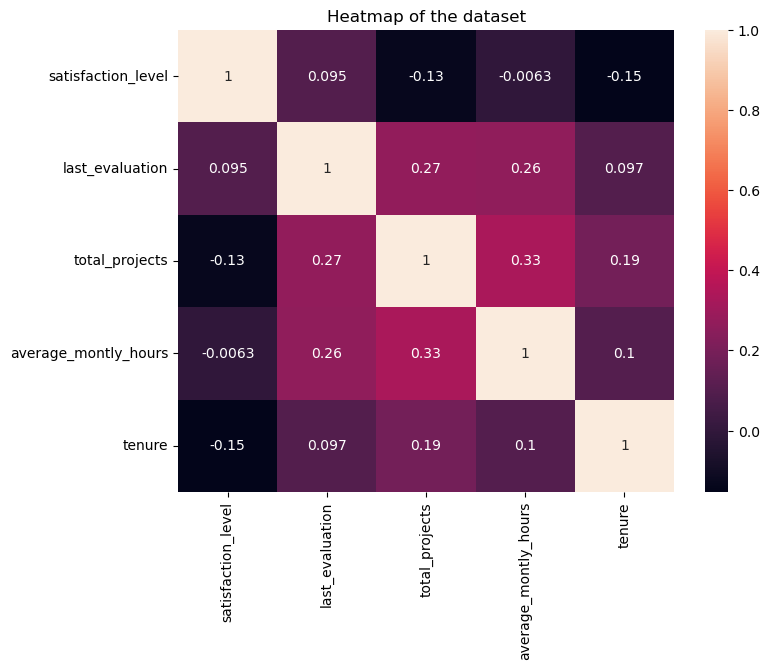

In [30]:
#Heatmap to realise how correlated variables are
plt.figure(figsize = (8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'total_projects', 
                    'average_montly_hours', 'tenure']].corr(), annot=True)
plt.title('Heatmap of the dataset')
plt.show()

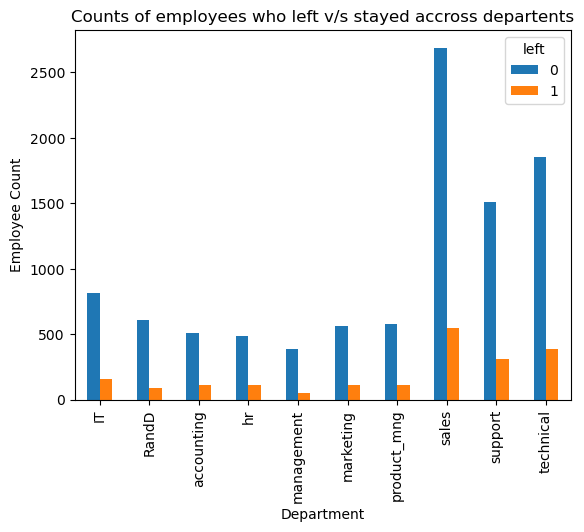

In [31]:
#A stacked bart plot to visualize number of employees across department, 
#comparing those who left with those who didn't.
pd.crosstab(df['department'], df['left']).plot(kind = 'bar')
plt.title('Counts of employees who left v/s stayed accross departents')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

In [32]:
#Removing outliers
#Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,total_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [33]:
#Isolating the outcome variable
y = df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [34]:
#Select the features you want to use in your model
X = df_logreg.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,total_projects,average_montly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,True,False,False


In [35]:
#Split the data into training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
#Construct a logistic regression model and fit it to the training dataset.
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [37]:
#Test the logistic regression model: use the model to make predictions on the test set.
y_pred = log_clf.predict(X_test)

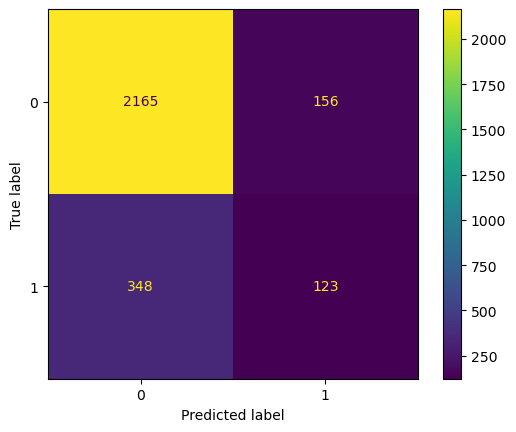

In [38]:
#Create a confusion matrix to visualize the results of the logistic regression model. 
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

A Classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [39]:
#Check the class balance in the dataset
df_logreg['left'].value_counts(normalize=True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced.

In [40]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

**Summary of model results**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Conclusion**
* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 